In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
pd.set_option('display.max_rows', None)

### Data Loading

In [2]:
#Loading the dataset

original_dataset = pd.read_csv("C:/Users/fetih.kaya/Desktop/CustomerTransactions.csv")
dataset = original_dataset.copy()

dataset.head()

,ID,CustomerLastName,X1,X2,X3,X4,X5,X6,X7,X8,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,1,Adams,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,2,Allen,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,Anderson,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,4,Bailey,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,Baker,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Explanatory Data Analysis

In [3]:
#General information about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 34 columns):
ID                  100 non-null int64
CustomerLastName    100 non-null object
X1                  100 non-null int64
X2                  100 non-null int64
X3                  100 non-null int64
X4                  100 non-null int64
X5                  100 non-null int64
X6                  100 non-null int64
X7                  100 non-null int64
X8                  100 non-null int64
X9                  100 non-null int64
X10                 100 non-null int64
X11                 100 non-null int64
X12                 100 non-null int64
X13                 100 non-null int64
X14                 100 non-null int64
X15                 100 non-null int64
X16                 100 non-null int64
X17                 100 non-null int64
X18                 100 non-null int64
X19                 100 non-null int64
X20                 100 non-null int64
X21                 100 non-null int6

***

<font color='red'>
    
**The dataset has;**

-32 attributes with dummy variables and 1 customer name column

-100 rows

-no null values in entries

***

</font>

In [4]:
#Statistical summary of the dataset

dataset.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.100000,0.100000,0.060000,0.120000,0.040000,0.120000,0.190000,0.200000,0.100000,...,0.050000,0.120000,0.060000,0.15000,0.090000,0.060000,0.170000,0.220000,0.170000,0.040000
std,29.011492,0.301511,0.301511,0.238683,0.326599,0.196946,0.326599,0.394277,0.402015,0.301511,...,0.219043,0.326599,0.238683,0.35887,0.287623,0.238683,0.377525,0.416333,0.377525,0.196946
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Preprocessing

##### Drop unimportant columns

In [5]:
dataset = dataset.drop('ID', axis=1)

***

<font color='red'>
    
**ID column shows just the indexes of the rows, does not carry important information**

***

</font>

##### Duplicated Entries

In [6]:
#Duplicated data search

dataset.duplicated().value_counts()

False    100
dtype: int64

***

<font color='red'>
    
**There are no duplicated entries**



***

</font>

##### Noisy Entries

In [7]:
#Search for noisy entries of each sub-groups of attributes

print(dataset.X1.unique())
print(dataset.X2.unique())
print(dataset.X3.unique())
print(dataset.X4.unique())
print(dataset.X5.unique())
print(dataset.X6.unique())
print(dataset.X7.unique())
print(dataset.X8.unique())
print(dataset.X9.unique())
print(dataset.X10.unique())
print(dataset.X11.unique())
print(dataset.X12.unique())
print(dataset.X13.unique())
print(dataset.X14.unique())
print(dataset.X15.unique())
print(dataset.X16.unique())
print(dataset.X17.unique())
print(dataset.X18.unique())
print(dataset.X19.unique())
print(dataset.X20.unique())
print(dataset.X21.unique())
print(dataset.X22.unique())
print(dataset.X23.unique())
print(dataset.X24.unique())
print(dataset.X25.unique())
print(dataset.X26.unique())
print(dataset.X27.unique())
print(dataset.X28.unique())
print(dataset.X29.unique())
print(dataset.X30.unique())
print(dataset.X31.unique())
print(dataset.X32.unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]


***

<font color='red'>
    
**There are no noisy entries**



***

</font>

### Data Modelling 

##### Elbow method application for determining the number of clusters

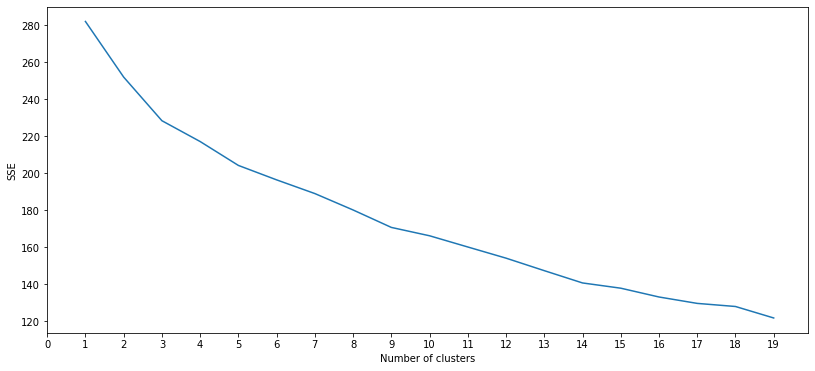

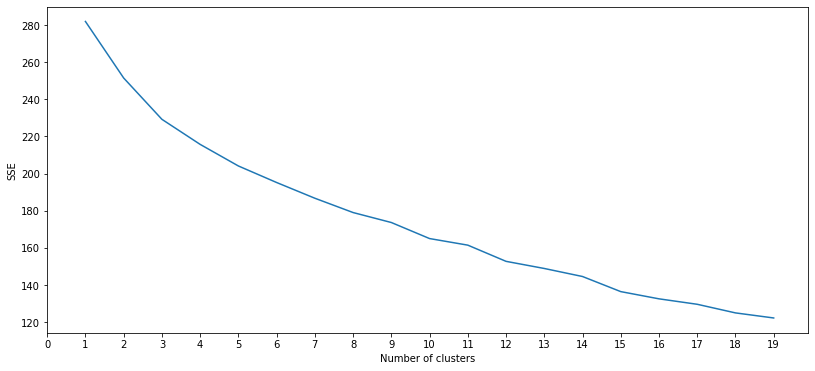

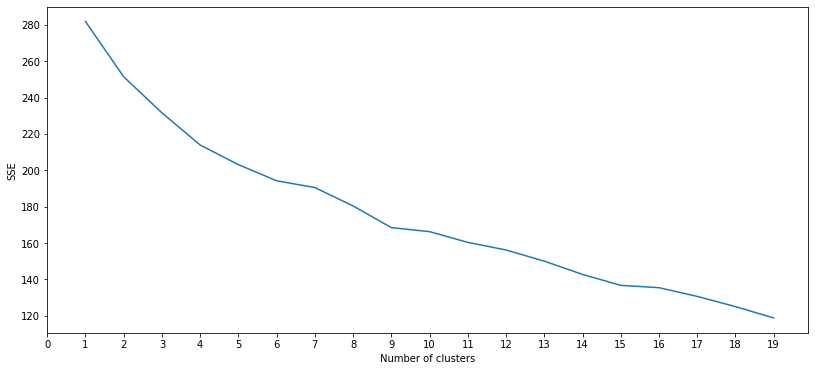

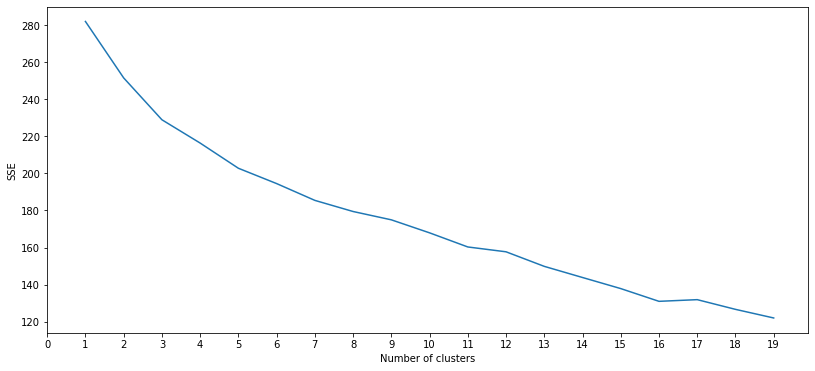

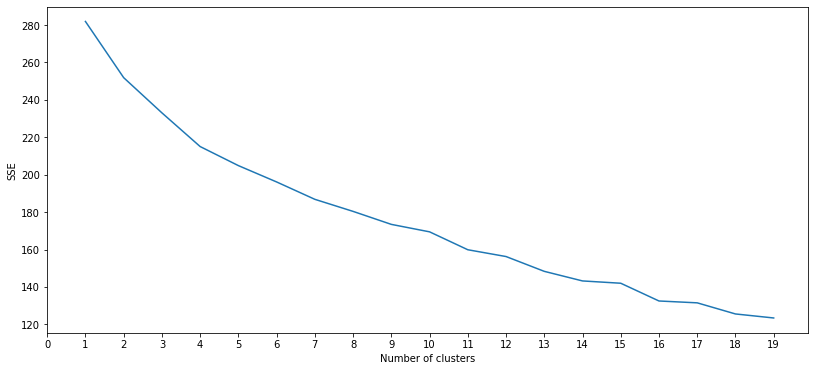

In [8]:
# Application of elbow method to determine number of clusters

sub_dataset = dataset.copy()
sub_dataset = sub_dataset.drop(["CustomerLastName"], axis=1)

for i in range(5):

    sse = {} #sum of squared errors
    for k in range(1, 20):
        kmeans = KMeans(n_clusters=k).fit(sub_dataset)
        sse[k] = kmeans.inertia_ 


    plt.figure(figsize=(30,6))
    plt.subplot(121)
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xticks(np.arange(0, 20, 1))
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")



***

<font color='red'>
    
**Applying the elbow method 5 times for different initial centroid points and graphing them shows that; dividing the dataset into 3 clusters will be appropriate. Because all trials gave same result; 3 clusters is the best**



***

</font>

#### APPLICATION OF CLUSTERING ALGORITHMS FOR 3 CLUSTERS

##### Model 1: Partitional clustering - Kmeans clustering

In [9]:
kmeans = KMeans(n_clusters=3).fit(sub_dataset)
y_pred = kmeans.predict(sub_dataset)

clusters = pd.DataFrame(y_pred.T, columns=["Kmeans_ClusterIDs"])
new_dataset = pd.concat([dataset.iloc[:,0],clusters], axis=1)

##### Model 2: Hierarchical clustering - Agglomerative clustering

In [10]:
agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_pred2 = agglo.fit_predict(sub_dataset)

clusters2 = pd.DataFrame(y_pred2.T, columns=["Agglomerative_ClusterIDs"])
new_dataset = pd.concat([new_dataset, clusters2], axis=1)

In [11]:
new_dataset

,CustomerLastName,Kmeans_ClusterIDs,Agglomerative_ClusterIDs
0,Adams,2,1
1,Allen,0,0
2,Anderson,1,2
3,Bailey,2,1
4,Baker,0,0
5,Barnes,0,0
6,Bell,1,2
7,Bennett,2,1
8,Brooks,0,0
9,Brown,2,1


##### The group members of each kmeans and agglomerative clustering for 3 clusters - Wrong clustered entries are colored with red

In [13]:
kmeans_group1 = []
kmeans_group2 = []
kmeans_group3 = []
Agglomerative_group1 = []
Agglomerative_group2 = []
Agglomerative_group3 = []

for i in range(new_dataset.shape[0]):
    if new_dataset.iloc[i,1] == 0:
        kmeans_group1.append(new_dataset.iloc[i,0])
        continue
        
    if new_dataset.iloc[i,1] == 1:
        kmeans_group2.append(new_dataset.iloc[i,0])
        continue
        
    if new_dataset.iloc[i,1] == 2:
        kmeans_group3.append(new_dataset.iloc[i,0])
        continue   
        

for i in range(new_dataset.shape[0]):        
    if new_dataset.iloc[i,2] == 0:
        Agglomerative_group1.append(new_dataset.iloc[i,0])
        continue    
        
    if new_dataset.iloc[i,2] == 2:
        Agglomerative_group2.append(new_dataset.iloc[i,0])
        continue
        
    if new_dataset.iloc[i,2] == 1:
        Agglomerative_group3.append(new_dataset.iloc[i,0])
        continue
        
df1 = pd.DataFrame(kmeans_group1, columns = ["kmeans_group1"])    
df11 = pd.DataFrame(Agglomerative_group1, columns = ["Agglomerative_group1"])
df2 = pd.DataFrame(kmeans_group2, columns = ["kmeans_group2"])
df12 = pd.DataFrame(Agglomerative_group2, columns = ["Agglomerative_group2"])
df3 = pd.DataFrame(kmeans_group3, columns = ["kmeans_group3"])
df13 = pd.DataFrame(Agglomerative_group3, columns = ["Agglomerative_group3"])        
        
        
df  = pd.concat([df1,df11,df2,df12,df3,df13], axis=1)        
df  = df.reset_index(drop=True)


def color_positive_green(val):
  
    if   val == 'Mitchell':
        color = 'red'
    elif val == 'Collins':
        color = 'red'
    elif val == 'Long':
        color = 'red'
    elif val == 'Rogers':
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color
  
df.style.applymap(color_positive_green)

,kmeans_group1,Agglomerative_group1,kmeans_group2,Agglomerative_group2,kmeans_group3,Agglomerative_group3
0,Allen,Allen,Anderson,Anderson,Adams,Adams
1,Baker,Baker,Bell,Bell,Bailey,Bailey
2,Barnes,Barnes,Campbell,Campbell,Bennett,Bennett
3,Brooks,Brooks,Cook,Cook,Brown,Brown
4,Butler,Butler,Cox,Cox,Carter,Carter
5,Clark,Clark,Flores,Flores,Cruz,Collins
6,Collins,Cooper,Gray,Gray,Diaz,Cruz
7,Cooper,Davis,Jenkins,Jenkins,Edwards,Diaz
8,Davis,Evans,Johnson,Johnson,Green,Edwards
9,Evans,Fisher,Moore,Mitchell,Gutierrez,Green


##### Comparison of the results of kmeans and agglomerative clustering for 3 clusters

In [14]:
true = 0

for i in range(dataset.shape[0]):
    if (new_dataset.iloc[i,1] == 0 and new_dataset.iloc[i,2] == 0):
        true += 1
    if (new_dataset.iloc[i,1] == 1 and new_dataset.iloc[i,2] == 2):
        true += 1
    if (new_dataset.iloc[i,1] == 2 and new_dataset.iloc[i,2] == 1):
        true += 1

similarity1 = true/dataset.shape[0]        
        
print("similarity of the results of kmeans and agglomerative clustering for 3 clusters :", similarity1)

similarity of the results of kmeans and agglomerative clustering for 3 clusters : 0.96


#### APPLICATION OF CLUSTERING ALGORITHMS FOR 4 CLUSTERS

In [22]:
#Kmeans clustering application
kmeans = KMeans(n_clusters=4).fit(sub_dataset)
y_pred = kmeans.predict(sub_dataset)

clusters = pd.DataFrame(y_pred.T, columns=["Kmeans_ClusterIDs"])
new_dataset = pd.concat([dataset.iloc[:,0],clusters], axis=1)


#Agglomerative vlustering application
agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_pred2 = agglo.fit_predict(sub_dataset)

clusters2 = pd.DataFrame(y_pred2.T, columns=["Agglomerative_ClusterIDs"])
new_dataset = pd.concat([new_dataset, clusters2], axis=1)

#New dataset
new_dataset

,CustomerLastName,Kmeans_ClusterIDs,Agglomerative_ClusterIDs
0,Adams,2,1
1,Allen,1,0
2,Anderson,3,2
3,Bailey,2,1
4,Baker,1,0
5,Barnes,1,0
6,Bell,3,2
7,Bennett,2,1
8,Brooks,1,0
9,Brown,2,1


In [25]:
#Comparison
true = 0

for i in range(dataset.shape[0]):
    if (new_dataset.iloc[i,1] == 0 and new_dataset.iloc[i,2] == 1):
        true += 1
    if (new_dataset.iloc[i,1] == 1 and new_dataset.iloc[i,2] == 0):
        true += 1
    if (new_dataset.iloc[i,1] == 2 and new_dataset.iloc[i,2] == 1):
        true += 1
    if (new_dataset.iloc[i,1] == 3 and new_dataset.iloc[i,2] == 2):
        true += 1
        
similarity2 = true/dataset.shape[0]   
                
print("similarity of the results of kmeans and agglomerative clustering for 4 clusters :", similarity2)

similarity of the results of kmeans and agglomerative clustering for 4 clusters : 0.69


#### APPLICATION OF CLUSTERING ALGORITHMS FOR 5 CLUSTERS

In [17]:
#Kmeans clustering application
kmeans = KMeans(n_clusters=5).fit(sub_dataset)
y_pred = kmeans.predict(sub_dataset)

clusters = pd.DataFrame(y_pred.T, columns=["Kmeans_ClusterIDs"])
new_dataset = pd.concat([dataset.iloc[:,0],clusters], axis=1)


#Agglomerative vlustering application
agglo = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred2 = agglo.fit_predict(sub_dataset)

clusters2 = pd.DataFrame(y_pred2.T, columns=["Agglomerative_ClusterIDs"])
new_dataset = pd.concat([new_dataset, clusters2], axis=1)

#New dataset
new_dataset

,CustomerLastName,Kmeans_ClusterIDs,Agglomerative_ClusterIDs
0,Adams,0,4
1,Allen,1,1
2,Anderson,4,2
3,Bailey,0,4
4,Baker,1,1
5,Barnes,2,1
6,Bell,4,2
7,Bennett,0,4
8,Brooks,1,0
9,Brown,0,4


In [18]:
#Comparison
true = 0

for i in range(dataset.shape[0]):
    if (new_dataset.iloc[i,1] == 0 and new_dataset.iloc[i,2] == 4):
        true += 1
    if (new_dataset.iloc[i,1] == 1 and new_dataset.iloc[i,2] == 1):
        true += 1
    if (new_dataset.iloc[i,1] == 2 and new_dataset.iloc[i,2] == 0):
        true += 1
    if (new_dataset.iloc[i,1] == 3 and new_dataset.iloc[i,2] == 3):
        true += 1
    if (new_dataset.iloc[i,1] == 4 and new_dataset.iloc[i,2] == 2):
        true += 1
        
similarity3 = true/dataset.shape[0]   
                
print("similarity of the results of kmeans and agglomerative clustering for 5 clusters :", similarity3)

similarity of the results of kmeans and agglomerative clustering for 5 clusters : 0.76


## SUMMARY

- For the given dataset which contains 100 rows and 32 attributes; partitional and hierarchical clustering were applied. Kmeans   algorithm was used for partitional clustering and agglomerative clustering was applied for hierarchical clustering

- The dataset was controlled by elbow method to determine how many clusters should be used for dividing. The results showed       that; the optimum number of clusters for this dataset is 3

- Clustering was applied with the numbers of clusters 3,4 and 5 and the clustering results of kmeans and agglomerative were       compared with each other

- The results showed that; for the number of clusters is 3 the matching score of kmeans and agglomerative was 96% while it was   69% and 76% for number of clusters 4 and 5 respectively

- This can be interpreted as; the optimum number of clusters should be 3 neither more nor less. If it is chosen different than 3, the algorithms start to make mistakes while clustering. Because they are forced to divide points more than their natural number of clusters